In [1]:
# Author : Arthur Prigent
# Email : aprigent@geomar.de

In [1]:
from load_librairies import *
import xscale.signal.fitting as xsf

def is_jja(month):
    return (month >= 6) & (month <= 8)

def is_amj(month):
    return (month >= 4) & (month <= 6)

def is_mjj(month):
    return (month >= 5) & (month <= 7)

######################
#      TO CHANGE     # 
######################
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'
path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'


In [2]:
# files created in:
## scripts_tmp/create_file_std_ssta_uasa_CMIP5.ipynb
## scripts_tmp/create_file_std_ssta_uasa_CMIP6.ipynb


## SSTa ##
ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')

## std SSTa in JJA ##

std_ssta_atl3_hist_cmip5_jja = ssta_atl3_hist_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip5_jja = ssta_atl3_ssp5_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month'])).std(dim='time')

std_ssta_atl3_hist_cmip6_jja = ssta_atl3_hist_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip6_jja = ssta_atl3_ssp5_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month'])).std(dim='time')

## std UASa in MJJ ##

std_ssta_changes_cmip5 = std_ssta_atl3_ssp5_cmip5_jja - std_ssta_atl3_hist_cmip5_jja
std_ssta_changes_cmip6 = std_ssta_atl3_ssp5_cmip6_jja - std_ssta_atl3_hist_cmip6_jja
combined_ssta_CMIP5_CMIP6 = np.hstack((std_ssta_changes_cmip5.values,std_ssta_changes_cmip6.values))

In [3]:
# Files created in:
## scripts_tmp/thermal_damping_CMIP5.ipynb
## scripts_tmp/thermal_damping_CMIP6.ipynb

## CMIP5 ##

qnet_hist_CMIP5_jja= xr.open_dataset(path_data+'thermal_damp_hist_jja_CMIP5.nc')
qnet_rcp8_CMIP5_jja= xr.open_dataset(path_data+'thermal_damp_ssp5_jja_CMIP5.nc')

qnet_changes_cmip5 = qnet_rcp8_CMIP5_jja.alpha[:] - qnet_hist_CMIP5_jja.alpha[:]

qlat_rcp8_CMIP5_jja= xr.open_dataset(path_data+'latent_damp_ssp5_jja_CMIP5.nc')
qlat_hist_CMIP5_jja= xr.open_dataset(path_data+'latent_damp_hist_jja_CMIP5.nc')

qsen_rcp8_CMIP5_jja= xr.open_dataset(path_data+'sensible_damp_ssp5_jja_CMIP5.nc')
qsen_hist_CMIP5_jja= xr.open_dataset(path_data+'sensible_damp_hist_jja_CMIP5.nc')

qswr_rcp8_CMIP5_jja= xr.open_dataset(path_data+'shortwave_damp_ssp5_jja_CMIP5.nc')
qswr_hist_CMIP5_jja= xr.open_dataset(path_data+'shortwave_damp_hist_jja_CMIP5.nc')

qlwr_rcp8_CMIP5_jja= xr.open_dataset(path_data+'longwave_damp_ssp5_jja_CMIP5.nc')
qlwr_hist_CMIP5_jja= xr.open_dataset(path_data+'longwave_damp_hist_jja_CMIP5.nc')

## CMIP6 ##
qnet_hist_CMIP6_jja= xr.open_dataset(path_data+'thermal_damp_hist_jja_CMIP6.nc')
qnet_rcp8_CMIP6_jja= xr.open_dataset(path_data+'thermal_damp_ssp5_jja_CMIP6.nc')

qnet_changes_cmip6 = qnet_rcp8_CMIP6_jja.alpha[:] - qnet_hist_CMIP6_jja.alpha[:]

qlat_hist_CMIP6_jja= xr.open_dataset(path_data+'latent_damp_hist_jja_CMIP6.nc')
qlat_rcp8_CMIP6_jja= xr.open_dataset(path_data+'latent_damp_ssp5_jja_CMIP6.nc')

qsen_hist_CMIP6_jja= xr.open_dataset(path_data+'sensible_damp_hist_jja_CMIP6.nc')
qsen_rcp8_CMIP6_jja= xr.open_dataset(path_data+'sensible_damp_ssp5_jja_CMIP6.nc')

qswr_hist_CMIP6_jja= xr.open_dataset(path_data+'shortwave_damp_hist_jja_CMIP6.nc')
qswr_rcp8_CMIP6_jja= xr.open_dataset(path_data+'shortwave_damp_ssp5_jja_CMIP6.nc')

qlwr_hist_CMIP6_jja= xr.open_dataset(path_data+'longwave_damp_hist_jja_CMIP6.nc')
qlwr_rcp8_CMIP6_jja= xr.open_dataset(path_data+'longwave_damp_ssp5_jja_CMIP6.nc')

In [4]:
combined_qnet_CMIP5_CMIP6 = np.hstack((qnet_changes_cmip5.values,qnet_changes_cmip6.values))

In [5]:
alpha0, interp0, r0, p_value0, std0 = stats.linregress(combined_qnet_CMIP5_CMIP6,combined_ssta_CMIP5_CMIP6[:])

In [6]:
x1 = np.arange(-15,25)
y1=x1*alpha0+interp0
n_replicate = 10000
N = combined_ssta_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_qnet_CMIP5_CMIP6[ind_resample],
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x1[:, np.newaxis] + result[:, 1]
ci_forecast_qneta_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [7]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts0 = tinv(0.05, len(x1)-2)


In [8]:
qnet_rcp8_CMIP5_jja_mean = qnet_rcp8_CMIP5_jja.mean(dim='product')
qnet_hist_CMIP5_jja_mean = qnet_hist_CMIP5_jja.mean(dim='product')
qlat_rcp8_CMIP5_jja_mean = qlat_rcp8_CMIP5_jja.mean(dim='product')
qlat_hist_CMIP5_jja_mean = qlat_hist_CMIP5_jja.mean(dim='product')
qsen_rcp8_CMIP5_jja_mean = qsen_rcp8_CMIP5_jja.mean(dim='product')
qsen_hist_CMIP5_jja_mean = qsen_hist_CMIP5_jja.mean(dim='product')
qswr_rcp8_CMIP5_jja_mean = qswr_rcp8_CMIP5_jja.mean(dim='product')
qswr_hist_CMIP5_jja_mean = qswr_hist_CMIP5_jja.mean(dim='product')
qlwr_rcp8_CMIP5_jja_mean = qlwr_rcp8_CMIP5_jja.mean(dim='product')
qlwr_hist_CMIP5_jja_mean = qlwr_hist_CMIP5_jja.mean(dim='product')


qnet_rcp8_CMIP6_jja_mean = qnet_rcp8_CMIP6_jja.mean(dim='product')
qnet_hist_CMIP6_jja_mean = qnet_hist_CMIP6_jja.mean(dim='product')
qlat_rcp8_CMIP6_jja_mean = qlat_rcp8_CMIP6_jja.mean(dim='product')
qlat_hist_CMIP6_jja_mean = qlat_hist_CMIP6_jja.mean(dim='product')
qsen_rcp8_CMIP6_jja_mean = qsen_rcp8_CMIP6_jja.mean(dim='product')
qsen_hist_CMIP6_jja_mean = qsen_hist_CMIP6_jja.mean(dim='product')
qswr_rcp8_CMIP6_jja_mean = qswr_rcp8_CMIP6_jja.mean(dim='product')
qswr_hist_CMIP6_jja_mean = qswr_hist_CMIP6_jja.mean(dim='product')
qlwr_rcp8_CMIP6_jja_mean = qlwr_rcp8_CMIP6_jja.mean(dim='product')
qlwr_hist_CMIP6_jja_mean = qlwr_hist_CMIP6_jja.mean(dim='product')

# Figure S2 heat flux damping

Text(0, 1.04, 'b)')

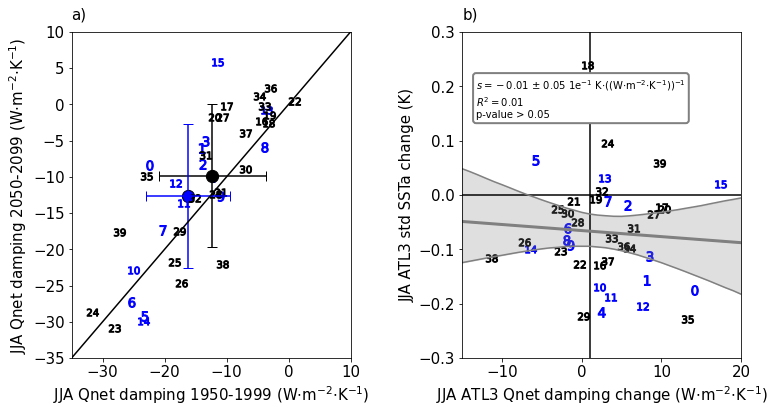

In [10]:
f,ax = plt.subplots(1,2,figsize=[12,6])
ftz=15
color_cmip5 = 'black'
color_cmip6 = 'blue'
m_cmip6 = np.arange(0,qnet_hist_CMIP6_jja.alpha.shape[0],1)
m_cmip5 = np.arange(qnet_hist_CMIP6_jja.alpha.shape[0],
                    qnet_hist_CMIP6_jja.alpha.shape[0] + qnet_hist_CMIP5_jja.alpha.shape[0],1)
ax=ax.ravel()
plt.subplots_adjust( hspace=0.3,
                    wspace=0.4)
ax[0].scatter(qnet_hist_CMIP6_jja_mean.alpha,
           qnet_rcp8_CMIP6_jja_mean.alpha,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black') 

for i in range(qnet_hist_CMIP6_jja.alpha.shape[0]):
    if i <10:
        
        ax[0].scatter(qnet_hist_CMIP6_jja.alpha[i],qnet_rcp8_CMIP6_jja.alpha[i],
           label=qnet_hist_CMIP6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=100,alpha=1) 
    else:
        
        ax[0].scatter(qnet_hist_CMIP6_jja.alpha[i],qnet_rcp8_CMIP6_jja.alpha[i],
           label=qnet_hist_CMIP6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=150,alpha=1)
        
        
        


ax[0].scatter(qnet_hist_CMIP5_jja_mean.alpha,
           qnet_rcp8_CMIP5_jja_mean.alpha,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')  

for k in range(qnet_hist_CMIP5_jja.alpha.shape[0]):
    if (qnet_hist_CMIP5_jja.p_value[i] <= 0.05) and (qnet_rcp8_CMIP5_jja.p_value[i] <= 0.05):
        ax[0].scatter(qnet_hist_CMIP5_jja.alpha[k],qnet_rcp8_CMIP5_jja.alpha[k],
           label=qnet_rcp8_CMIP5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150,alpha=1)
        
    elif (qnet_hist_CMIP5_jja.p_value[i] > 0.05) or (qnet_rcp8_CMIP5_jja.p_value[i] > 0.05):
        ax[0].scatter(qnet_hist_CMIP5_jja.alpha[k],qnet_rcp8_CMIP5_jja.alpha[k],
           label=qnet_rcp8_CMIP5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150,alpha=0.25)
        
        
ax[0].set_xlabel('JJA Qnet damping 1950-1999 (W$\cdot$m$^{-2}$$\cdot$K$^{-1}$)',fontsize=ftz)
ax[0].set_ylabel('JJA Qnet damping 2050-2099 (W$\cdot$m$^{-2}$$\cdot$K$^{-1}$)',fontsize=ftz)

x = np.arange(-45,15)
y=x
ax[0].plot(x,y,color='black',label='one-to-one')
ax[0].set_ylim([-35,10])
ax[0].set_xlim([-35,10])
ax[0].tick_params(labelsize=ftz)

ax[0].errorbar(qnet_hist_CMIP5_jja.alpha.mean(dim='product'),
              qnet_rcp8_CMIP5_jja.alpha.mean(dim='product'),
             xerr=qnet_hist_CMIP5_jja.alpha.std(dim='product'),
             yerr=qnet_rcp8_CMIP5_jja.alpha.std(dim='product'),color='black',fmt='o',capsize=5)

ax[0].errorbar(qnet_hist_CMIP6_jja.alpha.mean(dim='product'),
              qnet_rcp8_CMIP6_jja.alpha.mean(dim='product'),
             xerr=qnet_hist_CMIP6_jja.alpha.std(dim='product'),
             yerr=qnet_rcp8_CMIP6_jja.alpha.std(dim='product'),color='blue',fmt='o',capsize=5)





for i in range(qnet_changes_cmip6.shape[0]):
    if i <10:
        ax[1].scatter(qnet_changes_cmip6[i],std_ssta_changes_cmip6[i],
           label=qnet_changes_cmip6.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=100)
        
    else:
        ax[1].scatter(qnet_changes_cmip6[i],std_ssta_changes_cmip6[i],
           label=qnet_changes_cmip6.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=150)


for k in range(qnet_changes_cmip5.shape[0]):
    ax[1].scatter(qnet_changes_cmip5[k],std_ssta_changes_cmip5[k],
          label=qnet_changes_cmip5.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=150)
ax[1].axhline(0,color='black')
ax[1].axvline(1,color='black')
ax[1].tick_params(labelsize=ftz)
x1 = np.arange(-15,25)
y1=x1*alpha0+interp0

ax[1].plot(x1,y1,linewidth=3,color='grey')

ax[1].plot(x1, ci_forecast_qneta_ssta[0], 'grey')
ax[1].plot(x1, ci_forecast_qneta_ssta[1], 'grey')
ax[1].fill_between(x1,y1,ci_forecast_qneta_ssta[0],color='grey',alpha=0.25)
ax[1].fill_between(x1,y1,ci_forecast_qneta_ssta[1],color='grey',alpha=0.25)



ax[1].set_ylim([-0.3,0.3])
ax[1].set_xlim([-15,20])
ax[1].set_ylabel('JJA ATL3 std SSTa change (K)',fontsize=ftz)
ax[1].set_xlabel('JJA ATL3 Qnet damping change (W$\cdot$m$^{-2}$$\cdot$K$^{-1}$)',fontsize=ftz)

if p_value0 <0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.2f 1e$^{-1}$ K$\cdot$((W$\cdot$m$^{-2}$$\cdot$K$^{-1}$))$^{-1}$' %
                     (alpha0*10, std0*ts0*10),
                     r'$R^{2}=%.2f$' % (r0**2, ),
                    'p-value < 0.05'))
    
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.2f 1e$^{-1}$ K$\cdot$((W$\cdot$m$^{-2}$$\cdot$K$^{-1}$))$^{-1}$' %
                     (alpha0*10, std0*ts0*10),
                     r'$R^{2}=%.2f$' % (r0**2, ),
                    'p-value > 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[1].text(0.05,
         0.86,
         textstr,
         transform=ax[1].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

plt.subplots_adjust( hspace=0.3,
                    wspace=0.4)
ax[0].text(0,
         1.04, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.04, 'b)',transform=ax[1].transAxes,size=ftz)

#plt.savefig(path_fig + 'figure_S2_review.png',
#             dpi = 300,
#            bbox_inches='tight')